# Data cleaning and manipulation
MUSA 0550 Geospatial Data Science in Python   
Anna Duan (annaduan@sas.upenn.edu)   
Fall 2023   
 
In the last notebook, we reviewed the basics of Python data structures and syntax. In this notebook, we will put those concepts to use and read, manipulate, and analyze crime data from [OpenDataPhilly.org](https://opendataphilly.org/datasets/crime-incidents/), a data source we will use often in this class. 

**Key concepts:**
1. load and inspect data
    - reading various filetypes using Pandas
    - head(), describe()
    - checking data types, shape, other dataframe attributes
2. data processing
    - cleaning data
    - handling missingness (isnull(), dropna(), fillna())
    - handling duplicates (drop_duplicates())
    - renaming columns
3. exploratory analysis
    - aggregating data with groupby()
    - pivoting from long to wide data
4. data visualization

References: 
- Python for Data Analysis, Wes McKinney 2022
- https://musa-550-fall-2023.github.io/ Nick Hand 2023
- https://www.geeksforgeeks.org/dataframe-attributes-in-python-pandas/ 

# Libraries 

In addition to `Pandas`, today we will be using `Matplotlib` to visualize our data.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# 1 Load and inspect data 
`Pandas` has built-in functionality for reading a variety of data types, including `read_csv` for csv files. The function `head()` allows us to view the first 5 rows by default.

In [77]:
crime24 = pd.read_csv('data/crime_2024.csv')
crime24.head(5)

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,NaN,3096883,NaN,18495129,35,2,2024-07-16 23:07:00+00,2024-07-16,19:07:00,19.0,2.024350e+11,5500 BLOCK OLD YORK RD,600,Thefts,NaN,NaN,NaN,NaN
1,0101000020E6100000D2AE9D8302CD52C068B6659FCBF9...,3097150,0101000020110F0000243A6FAA61EF5FC1226010300589...,13624408,18,3,2024-02-18 03:55:00+00,2024-02-17,22:55:00,22.0,2.024180e+11,4000 BLOCK SPRUCE ST,600,Thefts,-75.203278,39.951527,39.951527,-75.203278
2,NaN,3097550,NaN,16015563,17,1,2024-05-08 20:27:00+00,2024-05-08,16:27:00,16.0,2.024170e+11,2100 BLOCK SOUTH ST,600,Thefts,NaN,NaN,NaN,NaN
3,NaN,3097995,NaN,16047705,18,3,2024-04-20 20:07:00+00,2024-04-20,16:07:00,16.0,2.024180e+11,4800 BLOCK CHESTER AV 409,600,Thefts,NaN,NaN,NaN,NaN
4,NaN,3098085,NaN,19576776,9,1,2024-08-02 23:48:00+00,2024-08-02,19:48:00,19.0,2.024091e+11,1700 BLOCK GREEN ST 3,600,Thefts,NaN,NaN,NaN,NaN


 `Describe` returns summary statistics for all numeric columns.

In [78]:
crime24.describe()

,cartodb_id,objectid,dc_dist,hour,dc_key,ucr_general,point_x,point_y,lat,lng
count,1.037180e+05,1.037180e+05,103718.000000,103716.000000,1.037180e+05,103718.000000,97219.000000,97219.000000,97219.000000,97219.000000
mean,3.220324e+06,1.635744e+07,17.447830,13.178246,2.024173e+11,971.705972,-75.145955,39.993454,39.993454,-75.145955
std,3.772043e+04,2.129953e+06,11.195805,5.719198,1.670604e+07,626.823503,0.423062,0.227281,0.227281,0.423062
min,3.096883e+06,1.213184e+07,1.000000,0.000000,1.992191e+11,100.000000,-80.502372,0.000000,0.000000,-80.502372
25%,3.186686e+06,1.451864e+07,9.000000,9.000000,2.024090e+11,600.000000,-75.185287,39.959037,39.959037,-75.185287
50%,3.224004e+06,1.629288e+07,16.000000,13.000000,2.024160e+11,700.000000,-75.156961,39.993112,39.993112,-75.156961
75%,3.253575e+06,1.830155e+07,24.000000,18.000000,2.024240e+11,1100.000000,-75.114734,40.030595,40.030595,-75.114734
max,3.279529e+06,1.971639e+07,77.000000,23.000000,2.024770e+11,2600.000000,0.000000,42.224336,42.224336,0.000000


Pandas dataframes also have useful [attributes](https://www.geeksforgeeks.org/dataframe-attributes-in-python-pandas/) which can be called to tell you more about the data. `shape`, `dtypes`, and `columns` are a good start. 

Note that the data types are not exactly the ones we looked at in the last notebook. For now, just remember that float64 and int64 are both numeric, and that object means string.

In [79]:
# shape tells us the dimensions of the dataframe (rows, columns)
print(f"Dataframe dimensions:\n", crime24.shape, "\n")  #\n is used to create a line break

Dataframe dimensions:
 (103718, 18) 



In [80]:
# dtypes tells us the data type of each column - recall numeric AND string types from last notebook
print(f"Column data types:\n", crime24.dtypes, "\n")

Column data types:
 the_geom                 object
cartodb_id                int64
the_geom_webmercator     object
objectid                  int64
dc_dist                   int64
psa                      object
dispatch_date_time       object
dispatch_date            object
dispatch_time            object
hour                    float64
dc_key                  float64
location_block           object
ucr_general               int64
text_general_code        object
point_x                 float64
point_y                 float64
lat                     float64
lng                     float64
dtype: object 



In [81]:
# column returns the column names
print(f"Column names:\n", crime24.columns, "\n")

Column names:
 Index(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'dc_dist',
       'psa', 'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour',
       'dc_key', 'location_block', 'ucr_general', 'text_general_code',
       'point_x', 'point_y', 'lat', 'lng'],
      dtype='object') 



# 2 Data processing
Data from external sources often contains more information than we need for our analysis. Referring back to the column names in our dataframe, we can select just the ones that we need using double square brackets. Unlike in R, column names must be in quotes. 

In [82]:
# Select a subset of columns
crime_subset = crime24[['hour', 'dispatch_date', 'lat', 'lng', 'text_general_code']]

# Display the first few rows of the subset
crime_subset.head(5)

,hour,dispatch_date,lat,lng,text_general_code
0,19.0,2024-07-16,NaN,NaN,Thefts
1,22.0,2024-02-17,39.951527,-75.203278,Thefts
2,16.0,2024-05-08,NaN,NaN,Thefts
3,16.0,2024-04-20,NaN,NaN,Thefts
4,19.0,2024-08-02,NaN,NaN,Thefts


Using rename(), let's shorten the column name for the crime types. This function takes a dictionary as its columns argument: on the left is the former name, on the right is the new name.

In [83]:
# rename columns
crime_subset = crime_subset.rename(columns={'text_general_code': 'crime'})
crime_subset.head(5)

,hour,dispatch_date,lat,lng,crime
0,19.0,2024-07-16,NaN,NaN,Thefts
1,22.0,2024-02-17,39.951527,-75.203278,Thefts
2,16.0,2024-05-08,NaN,NaN,Thefts
3,16.0,2024-04-20,NaN,NaN,Thefts
4,19.0,2024-08-02,NaN,NaN,Thefts


`notnull()` and `isna()` are useful for filtering out missing values. Here, we are subsetting the values that fulfill the condition of neither 'hour' nor 'crime' being a null value. In other instances, we may require that only one is non-null, in which case we would use '|', meaning 'or', instead of '&'.

In [84]:
# Filter out missing lat/lng values
crime_clean = crime_subset[crime_subset['hour'].notnull() & crime_subset['crime'].notnull()]

crime_subset.shape

(103718, 5)

# 3 Exploratory analysis

Now the data is ready for analysis. Let's take a look first at the types of crimes commited. Using `unique()`, we can view all of the unique values for a given column.

In [85]:
crime_subset['crime'].unique()

array(['Thefts', 'Fraud', 'Theft from Vehicle',
       'Aggravated Assault No Firearm', 'Aggravated Assault Firearm',
       'Burglary Non-Residential', 'Robbery Firearm', 'Rape',
       'Robbery No Firearm', 'Burglary Residential', 'Other Assaults',
       'Vandalism/Criminal Mischief', 'Weapon Violations',
       'All Other Offenses', 'Disorderly Conduct',
       'Narcotic / Drug Law Violations', 'Receiving Stolen Property',
       'Other Sex Offenses (Not Commercialized)',
       'Offenses Against Family and Children',
       'DRIVING UNDER THE INFLUENCE', 'Arson', 'Embezzlement',
       'Forgery and Counterfeiting', 'Vagrancy/Loitering',
       'Prostitution and Commercialized Vice', 'Motor Vehicle Theft',
       'Liquor Law Violations', 'Gambling Violations',
       'Public Drunkenness', 'Homicide - Criminal',
       'Homicide - Justifiable'], dtype=object)

Let's find out what types of crime are most common. We will use `value_counts()` to count the number of occurences (rows) associated with each unique crime value. It looks like theft and assault are the most common categories.

In [86]:
# Count number of crimes per type
crime_count = crime_clean['crime'].value_counts()
crime_count

crime
Thefts                                     26109
Other Assaults                             17640
All Other Offenses                          9415
Motor Vehicle Theft                         9411
Vandalism/Criminal Mischief                 9288
Theft from Vehicle                          7220
Fraud                                       5280
Aggravated Assault No Firearm               3609
Burglary Residential                        2260
Narcotic / Drug Law Violations              1932
Aggravated Assault Firearm                  1875
Weapon Violations                           1805
Robbery No Firearm                          1665
Robbery Firearm                             1075
Burglary Non-Residential                     991
Receiving Stolen Property                    820
Other Sex Offenses (Not Commercialized)      739
DRIVING UNDER THE INFLUENCE                  604
Arson                                        465
Rape                                         324
Disorderly Con

What about time of day? Let's take a look at the hour column.

The most incidents occur at 4pm followed by 5pm and noon.

In [87]:
# Count number of crimes per hour
hour_count = crime_clean['hour'].value_counts()
hour_count

hour
16.0    7752
17.0    7103
12.0    6727
11.0    6534
13.0    6418
10.0    6339
18.0    6212
9.0     6161
15.0    5905
19.0    5425
8.0     5334
20.0    4812
14.0    4801
21.0    3874
0.0     2997
23.0    2906
22.0    2887
7.0     2669
1.0     2229
2.0     1758
3.0     1415
4.0     1201
5.0     1176
6.0     1081
Name: count, dtype: int64

Do different crimes have unique temporal patterns? Let's use `groupby` to find out. Grouping by 'hour' and 'crime' means that we are calculating the frequency of each unique hour-crime type combination (thefts at 12am, thefts at 1am, thefts at 2am, and so on...)

In [88]:
# group by hour and crime
hour_crime = crime_clean.groupby(['hour', 'crime']).size().reset_index(name='count')
hour_crime

# select only the top 5 crimes
top_crimes = crime_count.index[0:5]

# filter out only the top 5 crimes
hour_crime_top5 = hour_crime[hour_crime['crime'].isin(top_crimes)]
hour_crime_top5

,hour,crime,count
2,0.0,All Other Offenses,561
11,0.0,Motor Vehicle Theft,221
14,0.0,Other Assaults,681
22,0.0,Thefts,322
23,0.0,Vandalism/Criminal Mischief,315
...,...,...,...
613,23.0,All Other Offenses,496
622,23.0,Motor Vehicle Theft,227
625,23.0,Other Assaults,549
634,23.0,Thefts,408


This following step is a little less intuitive: we are turning the data from ['long' format into 'wide'](https://www.statology.org/long-vs-wide-data/) to allow us to plot the temporal patterns of the top crime types side-by-side in a facet plot.

In `long format`, each observation or measurement has its own row, and multiple columns represent different aspects of that observation, such as the variable name and the value.

In `wide format`, each unique identifier (e.g., a subject, individual, or time period) has a single row, and multiple columns represent different variables or observations.

In [91]:
# long format
hour_crime_top5.head(10)

,hour,crime,count
2,0.0,All Other Offenses,561
11,0.0,Motor Vehicle Theft,221
14,0.0,Other Assaults,681
22,0.0,Thefts,322
23,0.0,Vandalism/Criminal Mischief,315
27,1.0,All Other Offenses,400
36,1.0,Motor Vehicle Theft,164
39,1.0,Other Assaults,461
47,1.0,Thefts,216
48,1.0,Vandalism/Criminal Mischief,250


In [92]:
# pivot the table
hour_crime_pivot = hour_crime_top5.pivot(index='hour', columns='crime', values='count')

# wide format
hour_crime_pivot.head(10)

crime,All Other Offenses,Motor Vehicle Theft,Other Assaults,Thefts,Vandalism/Criminal Mischief
hour,,,,,
0.0,561,221,681,322,315
1.0,400,164,461,216,250
2.0,200,147,326,177,219
3.0,137,131,244,123,209
4.0,101,179,191,123,149
5.0,96,169,141,170,161
6.0,183,140,128,156,129
7.0,159,506,276,537,328
8.0,281,960,624,1143,628


Now let's write out the tables we've made as csv files. This way, you will not need to rerun all of the data processing code each time you want to use this data. 

When writing objects to files, the syntax is the following: `object.to_csv('filepath/filename.filetype')`.

In [126]:
# write to csv
crime_count.to_csv('data/crime_count.csv')
hour_count.to_csv('data/hour_count.csv')
hour_crime_pivot.to_csv('data/hour_crime_pivot.csv')

# 4 Visualizing data using matplotlib 

To visualize some of our data, we'll read in the csv files we just created.

In [94]:
crime_count = pd.read_csv('data/crime_clean.csv')
hour_count = pd.read_csv('data/hour_count.csv')
hour_crime_pivot = pd.read_csv('data/hour_crime_pivot.csv')

Now let's plot our data. When exploring datasets or performing analyses, it can be helpful to visualize trends in our data. Let's start with the hourly trends across the crime dataset.  

Recall that we imported `matplotlib.pyplot`, a module of plotting library `matplotlib`, as `plt` at the top of this notebook. Now, we can call `plt` to initialize a plot and add specifications to it. The basic component functions of a matplotlib plot are the following:
- `figure`: the window that the plot will be on. Think of this as a blank canvas. Here, we specify the dimensions (and number number of subplots, if applicable)  
- plot-type function (`barh`, or horizontal bar, in this case): this function specifies the type of plot we are creating. Typically, the arguments are the x and y variables to be plotted, as well as optional aesthetics such as color.  
- `xlabel` and `ylabel`: axis labels - this allows us to bypass the less appealing column names that are the default axis labels  
- `title`: self explanatory.  

Beyond the basic arguments, there are countless ways to personalize plot aesthetics. Here, we'll just use `grid` and `box` to remove unnecessary clutter from our plot. To see what these functions do, try commenting out lines 7 and 8 and running the code chunk.

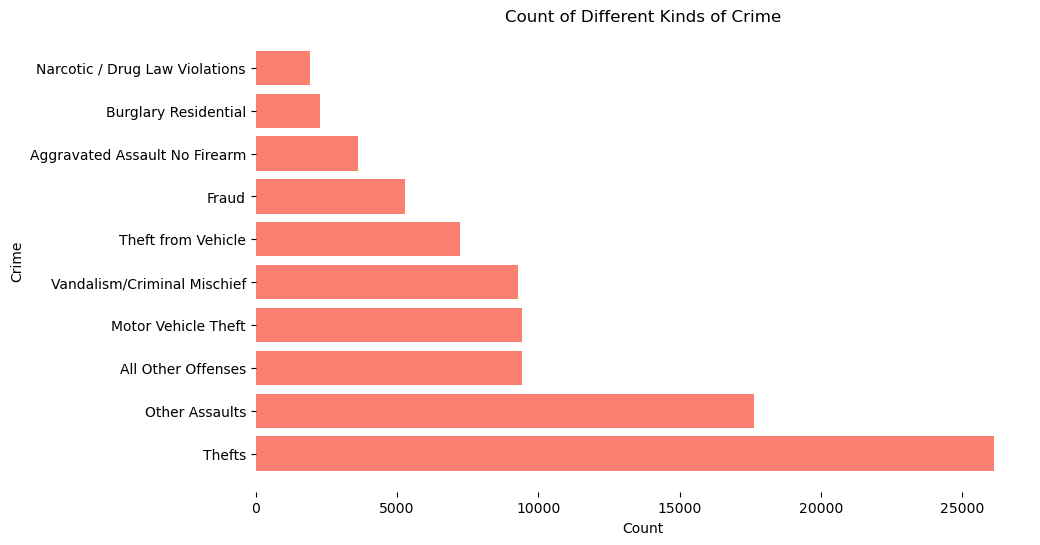

In [131]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(crime_count.head(10)['crime'], crime_count.head(10)['count'], color='salmon')  # plot-type function: we are using a horizontal bar plot, and plotting the top 10 crimes using head()
plt.xlabel('Count')
plt.ylabel('Crime')
plt.title('Count of Different Kinds of Crime')
plt.grid(False)
plt.box(False)

Now let's look at the temporal trends in Philadelphia crime incidents. Like before, we are making use of `figure`, a plot-type function, `xlabel`, `ylabel`, and `title`. For this plot, we are making a regular bar chart instead of a horizontal one because it's easier to interpret change from left to right. We are also introducing `xticks`, which sets custom value labels on the x axis. 

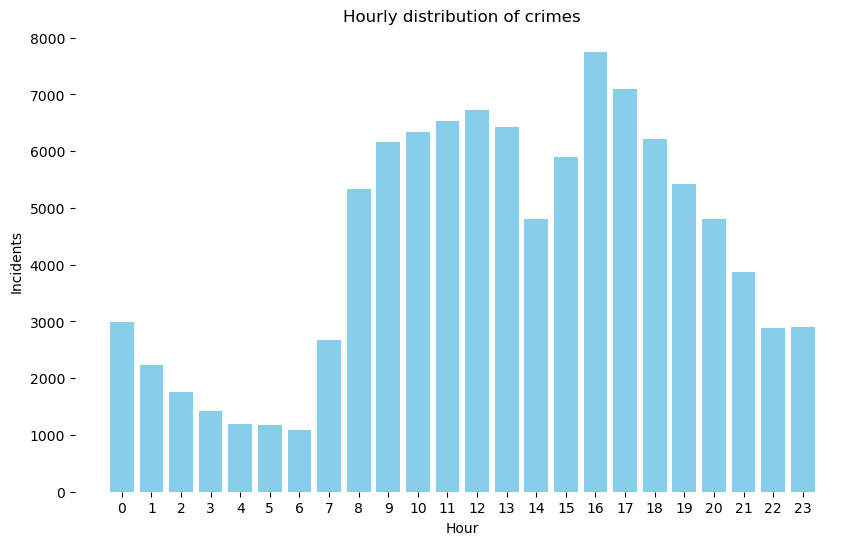

In [139]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(hour_count.sort_values(by='hour')['hour'], hour_count.sort_values(by='hour')['count'], color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Incidents')
plt.title('Hourly distribution of crimes')
plt.xticks(range(24))
plt.grid(False)
plt.box(False)

Let's combine these concepts to see if there are differences in temporal patterns across the top 5 crime categories. Adding to our previous codebase, we add a `subplots` argument to indicate that we want to visualize each crime type individually. 

Looking at the plot, what can we tell about the timing of each crime type?

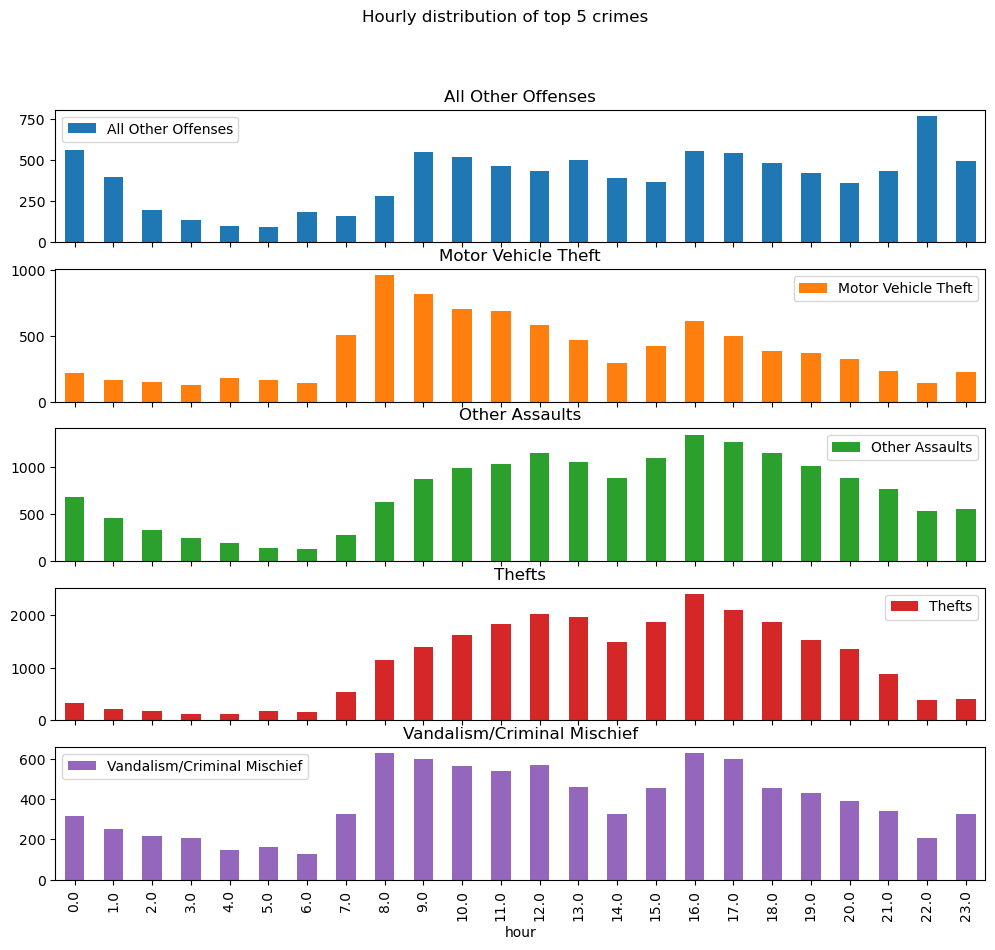

In [140]:
# Specify the x and y columns
ax = hour_crime_pivot.plot(
    kind='bar', 
    x='hour',  # Assuming 'hour' is the column representing the x-axis
    y=hour_crime_pivot.columns.difference(['hour']),  # Plot all columns except 'hour'
    subplots=True,  # Ensure there's no subplot created for 'hour'
    figsize=(12, 10),
    title='Hourly distribution of top 5 crimes'
)

# 